# MVI - Semestral Project
## Pattern recognition on wafer bin maps
##### => Create an augmented dataset of defects on wafer bin maps and train a map size independent CNN classifier to recognize them

* ### Wafer Map Introduction

#### What is a wafer bin map ?

Wafers are used in manufacturing process (semiconductor essentially).
<br>A wafer bin map (WBM) is the result of an electrical die-sorting test. It provides information on which bins failed what tests. 

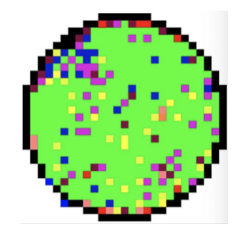

In [1]:
import matplotlib.pyplot as plt
img = plt.imread("waferBinMap.png")
plt.imshow(img)
plt.axis("off")
plt.show()

Here is what a wafer bin map can look like

* ### Imports

In [2]:
import os
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras import layers, Input, models
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

* ### Dataset / Data import

In [3]:
os.listdir()

['WaferMaps_Pattern_Recognition_Documentation.pdf',
 '.DS_Store',
 'Documentation.pages',
 'Présentation1.pptx',
 'WaferMaps_Pattern_Recognition.ipynb',
 'LSWMD.pkl',
 'WaferMaps_Pattern_Recognition.pdf',
 '.ipynb_checkpoints',
 '~$Présentation1.pptx',
 'waferBinMap.png']

In [4]:
df_original=pd.read_pickle("LSWMD.pkl")
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


The dataset has <b>811,457 lines </b>and<b> 6 columns.</b><br> There is information on waferMaps representation, and other data such as waferMap dieSize, waferMap lotName, waferMap Index etc. (all the other columns)



In [5]:
df = df_original.copy()

In [6]:
df.rename(columns = {'trianTestLabel': 'trainTestLabel'}, inplace=True)


In [7]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [8]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dieSize,811457.0,1840.998585,2254.987374,3.0,710.0,953.0,1902.0,48099.0
waferIndex,811457.0,12.961207,7.207489,1.0,7.0,13.0,19.0,25.0


In [10]:
df.dtypes

waferMap           object
dieSize           float64
lotName            object
waferIndex        float64
trainTestLabel     object
failureType        object
dtype: object

In [11]:
def array_values(x):
    if x.shape == (1,1):
        return x[0][0]
    else:
        return 0 
df.trainTestLabel = df.trainTestLabel.apply(lambda x: array_values(x))
df.failureType = df.failureType.apply(lambda x: array_values(x))

In [12]:
df

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,none
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,none
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,none
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,Training,none
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,Training,none
...,...,...,...,...,...,...
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Test,Edge-Ring
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Test,Edge-Loc
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,Test,Edge-Ring
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,0,0


* ### Data Explanation

##### * waferMap

In [13]:
wafer_0 = df.waferMap[0]
wafer_0

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
wafer_0.shape

(45, 48)

In [15]:
df["waferDim"] = df.apply(lambda x : (np.size(x.waferMap,axis=0),np.size(x.waferMap,axis=1)), axis=1)

In [16]:
df.iloc[0]

waferMap          [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
dieSize                                                      1683.0
lotName                                                        lot1
waferIndex                                                      1.0
trainTestLabel                                             Training
failureType                                                    none
waferDim                                                   (45, 48)
Name: 0, dtype: object

Let's plot the two first wafermaps from the dataset :

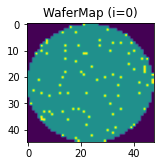

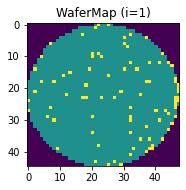

In [17]:
plt.figure(figsize=(5,5))
for i in range(2):
    ax = plt.subplot(1,2,i+1)
    ax.imshow(df.waferMap[i])
    ax.set_title("WaferMap (i={})".format(i))
    plt.show()

In [18]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType,waferDim
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,none,"(45, 48)"
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,none,"(45, 48)"
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,none,"(45, 48)"
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,Training,none,"(45, 48)"
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,Training,none,"(45, 48)"


In [19]:
df.trainTestLabel.value_counts()

0           638507
Test        118595
Training     54355
Name: trainTestLabel, dtype: int64

In [20]:
df.waferDim

0         (45, 48)
1         (45, 48)
2         (45, 48)
3         (45, 48)
4         (45, 48)
            ...   
811452    (26, 30)
811453    (26, 30)
811454    (26, 30)
811455    (26, 30)
811456    (26, 30)
Name: waferDim, Length: 811457, dtype: object

In [21]:
#wafer_no_fail = df.loc[df["failureType"]=="none"].iloc[0].waferMap
#plt.figure(figsize=(5,5))
#fig = px.imshow(wafer_no_fail, title="WaferMap with no failure recorded")
#fig.update_xaxes(showticklabels=False)
#fig.update_yaxes(showticklabels=False)
#plt.show()

##### * dieSize

In [22]:
df.dieSize

0         1683.0
1         1683.0
2         1683.0
3         1683.0
4         1683.0
           ...  
811452     600.0
811453     600.0
811454     600.0
811455     600.0
811456     600.0
Name: dieSize, Length: 811457, dtype: float64

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dieSize,811457.0,1840.998585,2254.987374,3.0,710.0,953.0,1902.0,48099.0
waferIndex,811457.0,12.961207,7.207489,1.0,7.0,13.0,19.0,25.0


Text(0, 0.5, 'number of wafermaps concerned')

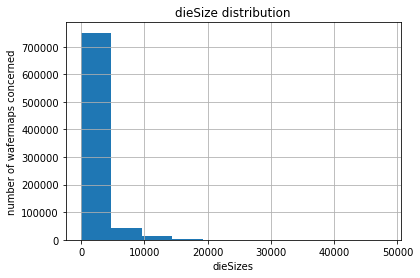

In [24]:
plt.hist(df.dieSize)
plt.title("dieSize distribution")
plt.grid()
plt.xlabel("dieSizes")
plt.ylabel("number of wafermaps concerned")

In [25]:
df_dieSizes = pd.DataFrame([], columns= df.columns)
mean_dieSize = df.describe().T["50%"]["dieSize"]
df_dieSizes = df_dieSizes.append(df.loc[df.dieSize==df.describe().T["min"]["dieSize"]].iloc[0])
df_dieSizes = df_dieSizes.append(df.loc[df.dieSize==df.describe().T["50%"]["dieSize"]].iloc[0])
df_dieSizes = df_dieSizes.append(df.loc[df.dieSize==df.describe().T["max"]["dieSize"]].iloc[0])
df_dieSizes

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType,waferDim
745584,"[[0, 1, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...",3.0,lot44867,20.0,Training,none,"(15, 3)"
429776,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",953.0,lot26060,1.0,0,0,"(33, 37)"
244100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",48099.0,lot15277,1.0,0,0,"(300, 202)"


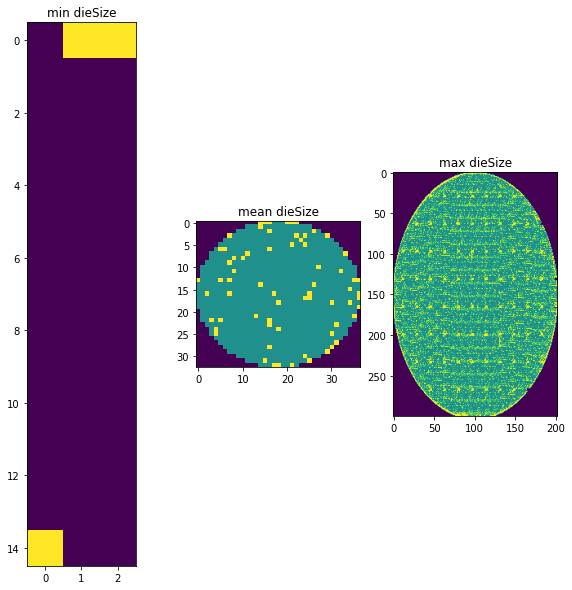

In [26]:
dieSizes = ['min', "mean", "max"]
plt.figure(figsize=(10,10))
for i in range(len(df_dieSizes)):
    ax = plt.subplot(1,3, i+1)
    ax.imshow(df_dieSizes.iloc[i].waferMap)
    ax.set_title(dieSizes[i] + " dieSize")
    #fig.update_xaxes(showticklabels=False)
    #fig.update_yaxes(showticklabels=False)
plt.show()

Indeed all waferMaps dimensions are different (dieSizes)

<AxesSubplot:>

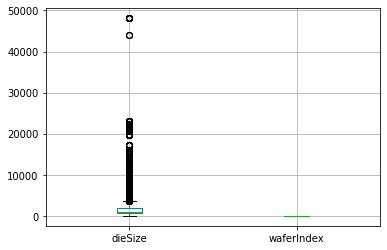

In [27]:
df.boxplot()

We can remark that there is a lot of outliers in the category dieSize so we have to find a way to have a better dataset for this category. These outliers may represent noise in the images, there is no good in keeping them.

##### * waferIndex
= the number of wafers in each lot (usually = 25)

In [28]:
df.waferIndex

0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
          ... 
811452    23.0
811453    24.0
811454    25.0
811455     1.0
811456     2.0
Name: waferIndex, Length: 811457, dtype: float64

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dieSize,811457.0,1840.998585,2254.987374,3.0,710.0,953.0,1902.0,48099.0
waferIndex,811457.0,12.961207,7.207489,1.0,7.0,13.0,19.0,25.0


In [30]:
df.waferIndex

0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
          ... 
811452    23.0
811453    24.0
811454    25.0
811455     1.0
811456     2.0
Name: waferIndex, Length: 811457, dtype: float64

Text(0, 0.5, 'number of lots concerned')

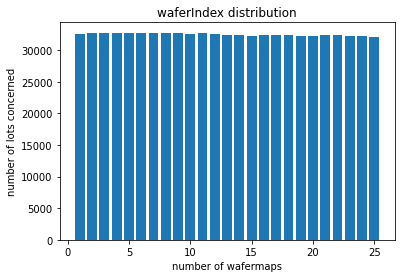

In [31]:
wafer_Indexes_values = np.unique(df.waferIndex, return_counts=True)
plt.bar(wafer_Indexes_values[0], wafer_Indexes_values[1])
plt.title("waferIndex distribution")
plt.xlabel("number of wafermaps")
plt.ylabel("number of lots concerned")

So not all of the lots have exactly 25 wafermaps.
<br>However, this information is not necessary for wafermap patterns so let's delete it. It may lead to better performance in the model later.

In [32]:
df.drop("waferIndex", axis=1, inplace=True)

In [33]:
df

,waferMap,dieSize,lotName,trainTestLabel,failureType,waferDim
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)"
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)"
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)"
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)"
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)"
...,...,...,...,...,...,...
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,Test,Edge-Ring,"(26, 30)"
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,Test,Edge-Loc,"(26, 30)"
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,Test,Edge-Ring,"(26, 30)"
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,0,0,"(26, 30)"


##### * lotName

This data represents the lot the wafer belongs to.

In [34]:
df.lotName

0             lot1
1             lot1
2             lot1
3             lot1
4             lot1
            ...   
811452    lot47542
811453    lot47542
811454    lot47542
811455    lot47543
811456    lot47543
Name: lotName, Length: 811457, dtype: object

Let's keep only the number of lot, it will be easier to proceed on the columns later

In [35]:
df.lotName = df.apply(lambda x : int(x.lotName.split("lot")[1]), axis=1 )

In [36]:
df.head()

,waferMap,dieSize,lotName,trainTestLabel,failureType,waferDim
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,1,Training,none,"(45, 48)"
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,1,Training,none,"(45, 48)"
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,1,Training,none,"(45, 48)"
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,1,Training,none,"(45, 48)"
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,1,Training,none,"(45, 48)"


In [37]:
df.lotName.describe()

count    811457.000000
mean      25052.937599
std       14031.563413
min           1.000000
25%       12939.000000
50%       24262.000000
75%       38294.000000
max       47543.000000
Name: lotName, dtype: float64

##### * trainTestLabel

It contains data on the wafer map : if it is for train or for test.

In [38]:
df.trainTestLabel

0         Training
1         Training
2         Training
3         Training
4         Training
            ...   
811452        Test
811453        Test
811454        Test
811455           0
811456           0
Name: trainTestLabel, Length: 811457, dtype: object

In [39]:
df.trainTestLabel.value_counts()

0           638507
Test        118595
Training     54355
Name: trainTestLabel, dtype: int64

In [40]:
df.loc[df.trainTestLabel==0].failureType.value_counts()

0    638507
Name: failureType, dtype: int64

All lines with no values on Train or Test labels will be deleted : they haven't been submitted to tests so there is no way to know if there was a failure or not on these maps. In this way, they are useless for the pattern recognition.

##### * failureType

In [41]:
df.failureType.value_counts()

0            638507
none         147431
Edge-Ring      9680
Edge-Loc       5189
Center         4294
Loc            3593
Scratch        1193
Random          866
Donut           555
Near-full       149
Name: failureType, dtype: int64

In [42]:
(df.failureType.value_counts()[0] + df.failureType.value_counts()["none"])/df.failureType.shape[0]*100

96.8551629969302

The failure types category are not proportionnaly distributed.<br>Moreover, he failure types 0 = no value and none = no failure (which represent almost 97% of the dataset) are not useful for us here but a data augmentation will be needed then because of the great amount of data lost

In [43]:
df.failureType = df.failureType.astype(str)

In [44]:
df.failureType.value_counts().index

Index(['0', 'none', 'Edge-Ring', 'Edge-Loc', 'Center', 'Loc', 'Scratch',
       'Random', 'Donut', 'Near-full'],
      dtype='object')

In [45]:
df[df.failureType == "Edge-Ring"].iloc[0]

waferMap          [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
dieSize                                                      2460.0
lotName                                                           5
trainTestLabel                                             Training
failureType                                               Edge-Ring
waferDim                                                   (53, 58)
Name: 100, dtype: object

In [46]:
np.sort(df.failureType.value_counts().index)

array(['0', 'Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc',
       'Near-full', 'Random', 'Scratch', 'none'], dtype=object)

In [47]:
failureType_dict = dict()
i=0
for failure in np.sort(df.failureType.value_counts().index):
        failureType_dict[failure] = i
        i = i +1
failureType_dict

{'0': 0,
 'Center': 1,
 'Donut': 2,
 'Edge-Loc': 3,
 'Edge-Ring': 4,
 'Loc': 5,
 'Near-full': 6,
 'Random': 7,
 'Scratch': 8,
 'none': 9}

In [48]:
df_failures = df.copy()
#df_failures.drop(df_failures[(df_failures.failureType == "0") | (df_failures.failureType == 'none')].index, inplace=True)
#df_failures.drop(df_failures[(df_failures.failureType == 'none')].index, inplace=True)
df_failures.failureType = df_failures.failureType.apply(lambda x : failureType_dict[x])



In [49]:
df_withlabel = df_failures[(df_failures.failureType>=1) & (df_failures.failureType<=9)]
df_withlabel =df_withlabel.reset_index()
df_withpattern = df_failures[(df_failures.failureType>=1) & (df_failures.failureType<=8)]
df_withpattern = df_withpattern.reset_index()
df_nonpattern = df_failures[(df_failures.failureType==9)]
df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0]

(172950, 25519, 147431)

In [50]:
print("% of wafers patterned :", df_withpattern.shape[0]/df_withlabel.shape[0])

% of wafers patterned : 0.14755131540907776


In [51]:
df_failures.drop(df_failures[(df_failures.failureType == "0") | (df_failures.failureType == 'none')].index, inplace=True)


/var/folders/2f/8fr4bzpj4nq7dv44v60tvz2m0000gn/T/ipykernel_16647/1440887961.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels2)


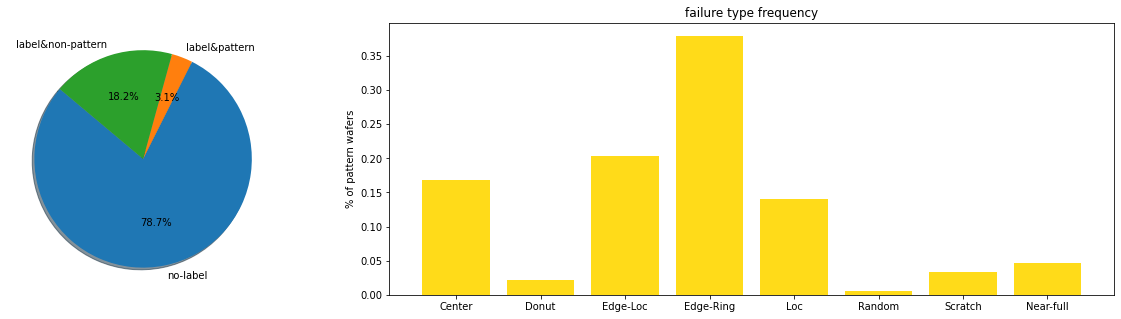

In [52]:
from matplotlib import gridspec
fig = plt.figure(figsize=(20, 5)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2.5]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

no_wafers=[df.shape[0]-df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0]]

#colors = ['silver', 'orange', 'gold']
labels = ['no-label','label&pattern','label&non-pattern']
ax1.pie(no_wafers, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

uni_pattern=np.unique(df_withpattern.failureType, return_counts=True)
labels2 = ['','Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']
ax2.bar(uni_pattern[0],uni_pattern[1]/df_withpattern.shape[0], color='gold', align='center', alpha=0.9)
ax2.set_title("failure type frequency")
ax2.set_ylabel("% of pattern wafers")
ax2.set_xticklabels(labels2)

plt.show()

The most failureType happening is Edge-Ring and Near-full is the less represented in the wafer maps pattern



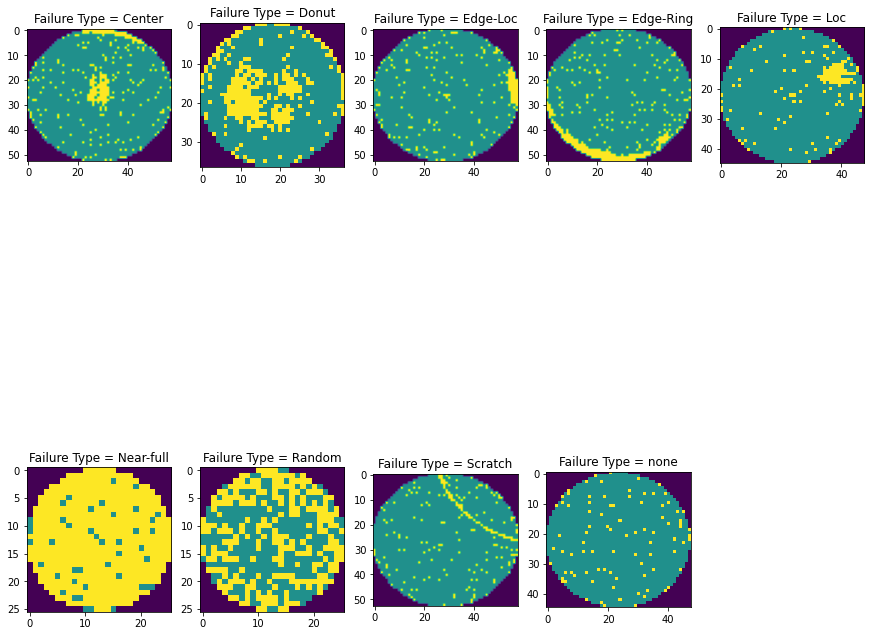

In [53]:
df_all_types_failures = pd.DataFrame([], columns=df.columns)
for i in df_failures.failureType.value_counts().index:
    if i not in [0]:
        df_all_types_failures = df_all_types_failures.append(df_failures[(df_failures.failureType == i)].iloc[0], ignore_index=True)
df_all_types_failures.reset_index()

plt.figure(figsize=(15, 15))
for i in range(len(df_all_types_failures)):
    ax = plt.subplot(2,5,i+1)
    pattern_failure = list(failureType_dict.keys())[list(failureType_dict.values()).index(i+1)]
    ax.imshow(df_all_types_failures.loc[df_all_types_failures.failureType==i+1].waferMap.iloc[0])
    ax.set_title("Failure Type = " + pattern_failure)


    #ax.update_xaxes(showticklabels=False)
    #ax.update_yaxes(showticklabels=False)
plt.show()
    
    #fig = px.imshow(df_all_types_failures.iloc[i].waferMap, title="Failure Type = "+ df_all_types_failures.iloc[i].failureType)
    #fig.update_xaxes(showticklabels=False)
    #fig.update_yaxes(showticklabels=False)
    #fig.show()

#### All dataset

Let's study if some columns are correlated to one another or not 

In [54]:
df.failureType.value_counts().index

Index(['0', 'none', 'Edge-Ring', 'Edge-Loc', 'Center', 'Loc', 'Scratch',
       'Random', 'Donut', 'Near-full'],
      dtype='object')

In [55]:
df_corr = df_failures.copy()
trainTestDict = {"Training":1, "Test":-1}
df_corr.trainTestLabel = df_corr.trainTestLabel.apply(lambda x : trainTestDict[x] if x!=0 else 0)



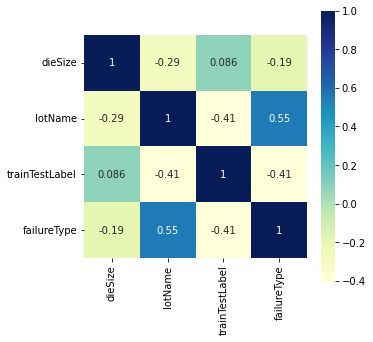

In [56]:
plt.figure(figsize=(5, 5))
sns.heatmap(df_corr.corr(),
            cmap='YlGnBu',
            annot=True, 
            square=True);
plt.show()

We can see that none of the columns in the dataset are correlated. We can only base our work on the recognition of the pattern from the waferMap; the other columns will not be used in the model.

* ### Data Cleaning



In [57]:
df.count()

waferMap          811457
dieSize           811457
lotName           811457
trainTestLabel    811457
failureType       811457
waferDim          811457
dtype: int64

In [58]:
df.waferMap[pd.isna(df.waferMap)==True]

Series([], Name: waferMap, dtype: object)

In [59]:
df.dieSize[pd.isna(df.dieSize)==True]

Series([], Name: dieSize, dtype: float64)

In [60]:
df.lotName[pd.isna(df.lotName)==True]

Series([], Name: lotName, dtype: int64)

In [61]:
df.trainTestLabel[pd.isna(df.trainTestLabel)==True]

Series([], Name: trainTestLabel, dtype: object)

In [62]:
df.failureType[pd.isna(df.failureType)==True]

Series([], Name: failureType, dtype: object)

So there isn't any none values in the dataset. Nevertheless, some has empty list, let's focus on them:

In [63]:
df.drop(df[df.trainTestLabel==0].index, inplace = True, axis=0)

In [64]:
df_no_failureType = df.copy()
df_no_failureType.drop(df_no_failureType[df_no_failureType.failureType!="none"].index, inplace = True, axis=0)
df_no_failureType

,waferMap,dieSize,lotName,trainTestLabel,failureType,waferDim
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,1,Training,none,"(45, 48)"
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,1,Training,none,"(45, 48)"
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,1,Training,none,"(45, 48)"
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,1,Training,none,"(45, 48)"
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,1,Training,none,"(45, 48)"
...,...,...,...,...,...,...
811438,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,47542,Test,none,"(26, 30)"
811439,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,47542,Test,none,"(26, 30)"
811442,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1,...",600.0,47542,Test,none,"(26, 30)"
811445,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,47542,Test,none,"(26, 30)"


This dataframe df_no_failureType contains all data with no failure registered : <i>none</i>. Whenever there were a missing failure data : [], these lines have been deleted.

In [65]:
df.drop(df[df.failureType=="none"].index, inplace = True, axis=0)
df

,waferMap,dieSize,lotName,trainTestLabel,failureType,waferDim
19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,1,Training,Loc,"(45, 48)"
36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,2,Training,Edge-Loc,"(53, 58)"
37,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,2,Training,Edge-Loc,"(53, 58)"
38,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,2,Training,Edge-Loc,"(53, 58)"
39,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,2,Training,Edge-Loc,"(53, 58)"
...,...,...,...,...,...,...
811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,47542,Test,Edge-Loc,"(26, 30)"
811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,47542,Test,Edge-Loc,"(26, 30)"
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,47542,Test,Edge-Ring,"(26, 30)"
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,47542,Test,Edge-Loc,"(26, 30)"


Here is the final dataset with values on trainTestLabel and failureType : <b>df</b>

<AxesSubplot:>

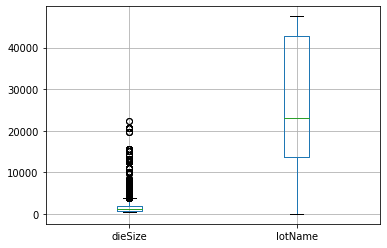

In [66]:
df.boxplot()

The outliers have not been modified so let's directly delete them 

<AxesSubplot:>

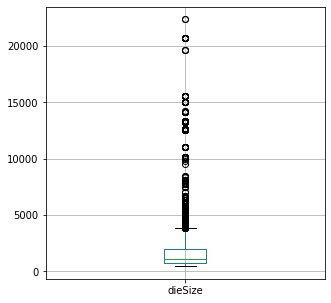

In [67]:
df.boxplot(column="dieSize", figsize=(5,5))

In [68]:
df_dieSize = df.copy()
df_dieSize.drop(df_dieSize[df_dieSize['dieSize'] > 4000].index, inplace = True)

<AxesSubplot:>

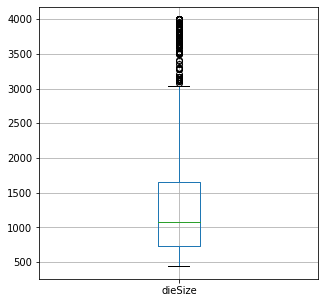

In [69]:
df_dieSize.boxplot(column="dieSize", figsize=(5,5))

In [70]:
df_dieSize.drop(df_dieSize[df_dieSize['dieSize'] > 3000].index, inplace = True)
#df_dieSize.boxplot(column = "dieSize")

<AxesSubplot:>

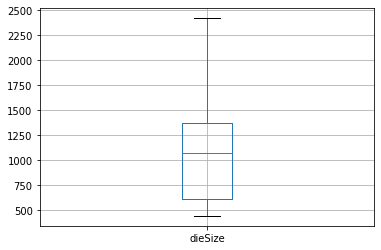

In [71]:
df_dieSize.drop(df_dieSize[df_dieSize['dieSize'] > 2450].index, inplace = True)
df_dieSize.boxplot(column = "dieSize")

In [72]:
df_dieSize.describe()

,dieSize,lotName
count,21338.000000,21338.000000
mean,1095.895679,29012.137548
std,509.834009,15495.083617
min,439.000000,1.000000
25%,607.000000,15542.250000
50%,1075.000000,35962.000000
75%,1376.000000,43913.000000
max,2422.000000,47542.000000


The mean is at the same order (~1000) but the maximum has been divided by 2.

In [73]:
df = df_dieSize.copy()


In [74]:
df = df.reset_index()
df.drop("index", axis=1, inplace=True)
df

,waferMap,dieSize,lotName,trainTestLabel,failureType,waferDim
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,1,Training,Loc,"(45, 48)"
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,...",533.0,8,Training,Edge-Ring,"(26, 26)"
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1,...",533.0,11,Training,Edge-Loc,"(26, 26)"
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2,...",533.0,16,Training,Edge-Loc,"(26, 26)"
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",533.0,16,Training,Edge-Loc,"(26, 26)"
...,...,...,...,...,...,...
21333,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,47542,Test,Edge-Loc,"(26, 30)"
21334,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,47542,Test,Edge-Loc,"(26, 30)"
21335,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,47542,Test,Edge-Ring,"(26, 30)"
21336,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,47542,Test,Edge-Loc,"(26, 30)"


In [75]:
trainTestDict = {"Training":1, "Test":-1}
df.trainTestLabel = df.trainTestLabel.apply(lambda x : trainTestDict[x] if x!=0 else 0)



In [76]:
print("The final shape of the dataset is ", df.shape)

The final shape of the dataset is  (21338, 6)


In [77]:
df_original.shape[0] - df.shape[0]

790119

* ### Data transformation (reshape)
I chose to consider only wafers with dimensions (26,26) because it the first squared dimensions in the value_counts (cf next cell) and will proceed with data augmentation in further parts

In [78]:
df.waferDim.value_counts()[:10]

(25, 27)    2900
(38, 36)    2127
(53, 52)    1519
(39, 37)    1015
(26, 26)     877
(30, 34)     710
(35, 31)     648
(44, 41)     600
(29, 26)     555
(41, 41)     527
Name: waferDim, dtype: int64

In [79]:
df.loc[df['waferDim'] == (26, 26)].failureType.value_counts()

Loc          297
Edge-Loc     296
Center        90
Random        74
Scratch       72
Edge-Ring     31
Near-full     16
Donut          1
Name: failureType, dtype: int64

In [80]:
df.loc[df['waferDim'] == (26, 26)]

,waferMap,dieSize,lotName,trainTestLabel,failureType,waferDim
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,...",533.0,8,1,Edge-Ring,"(26, 26)"
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1,...",533.0,11,1,Edge-Loc,"(26, 26)"
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2,...",533.0,16,1,Edge-Loc,"(26, 26)"
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",533.0,16,1,Edge-Loc,"(26, 26)"
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2,...",533.0,16,1,Edge-Loc,"(26, 26)"
...,...,...,...,...,...,...
14139,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,42175,-1,Loc,"(26, 26)"
14140,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,42176,-1,Center,"(26, 26)"
14141,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2,...",533.0,42176,-1,Edge-Loc,"(26, 26)"
14142,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,42176,-1,Edge-Loc,"(26, 26)"


Considering the further CNN the wafer maps data have to be in a compatible shape : 

In [81]:
df_waferDim = df.loc[df['waferDim'] == (26, 26)]
sub_wafer = df_waferDim['waferMap'].values

new_sub_wafer = np.ones((1, 26, 26))
label = []

for i in range(len(df_waferDim)):
    new_sub_wafer = np.concatenate((new_sub_wafer, df_waferDim.iloc[i,:]['waferMap'].reshape(1, 26, 26)))
    label.append(df_waferDim.iloc[i,:]['failureType'])

x = new_sub_wafer[1:]
y = np.array(label).reshape((-1,1)) #each element is one list in the array
print('x :', x.shape)
print('y :', y.shape)


x : (877, 26, 26)
y : (877, 1)


x represents all the wafermaps reunited (877), each with a shape of (26,26)<br>y is one column which is the failure types corresponding to the wafers in x for each row

In [82]:
y_failureTypes = np.unique(y)

In [83]:
x = x.reshape((-1, 26, 26, 1))
new_x = np.zeros((len(x), 26, 26, 3))

for w in range(len(x)):
    for i in range(26):
        for j in range(26):
            new_x[w, i, j, int(x[w, i, j])] = 1
new_x.shape


(877, 26, 26, 3)

In [84]:
#new_x[0]

In [85]:
len(new_x[0])

26

In [86]:
new_x_flip = np.zeros(new_x.shape)
for i in range(len(new_x)):
    for j in range(len(new_x[0])):
        new_x_flip[i][j] = new_x[i][j][::-1]

In [87]:
new_y_flip = y[::-1]

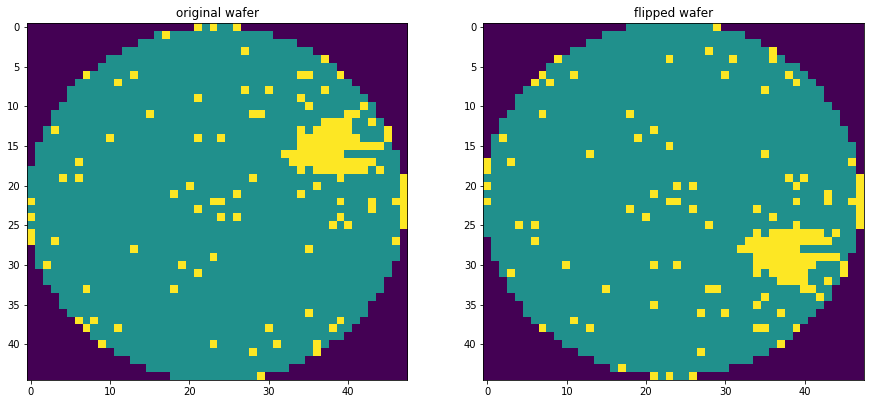

In [88]:
plt.figure(figsize=(15, 15))
wafers = [df.waferMap[0], df.waferMap[0][::-1]]
for i in range(2):
    ax = plt.subplot(1,2,i+1)

    ax.imshow(wafers[i])
    if i==0:
        ax.set_title("original wafer")
    if i==1:
        ax.set_title("flipped wafer")
plt.show()

* ### Data augmentation
<br>After cleaning the dataset, a lot of lines have been deleted (790 119).  
<br>Data augmentation is similar to collecting new data (though it doesn't bring as much new data) because it adds more data on the dataset. This principle can also augment the performance of deep learning, therefore it is useful to apply it here. This data is based on the first dataset we had : a simple convolutional autoencoder is used.
<br>Wafer maps are similar to images so in order to augment the data it is interesting to use a convolutional autoencoder. A simple flip of the image cannot happen here because some patterns (for example Scratch) are in a specific position. 

In [89]:
####
# Encoder
input_shape = (26, 26, 3)
input_tensor = Input(input_shape)
encode = layers.Conv2D(64, (3,3), padding='same', activation='relu')(input_tensor)
latent_vector = layers.MaxPool2D()(encode)

# Decoder
decode_layer_1 = layers.Conv2DTranspose(64, (3,3), padding='same', activation='relu')
decode_layer_2 = layers.UpSampling2D()
output_tensor = layers.Conv2DTranspose(3, (3,3), padding='same', activation='sigmoid')

# connect decoder layers
decode = decode_layer_1(latent_vector)
decode = decode_layer_2(decode)

gen_data_encoder = models.Model(input_tensor, output_tensor(decode))
gen_data_encoder.compile(optimizer = 'Adam',
              loss = 'mse',
             )




2022-01-13 17:49:57.219631: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [90]:
gen_data_encoder.fit(new_x, new_x,
       batch_size=1024,
       epochs=20,
       verbose=2)
encoder = models.Model(input_tensor, latent_vector)
decoder_input = Input((13, 13, 64))
decode = decode_layer_1(decoder_input)
decode = decode_layer_2(decode)

decoder = models.Model(decoder_input, output_tensor(decode))

encoded_x = encoder.predict(new_x)

noised_encoded_x = encoded_x + np.random.normal(loc=0, scale=0.1, size = (len(encoded_x), 13, 13, 64))



Epoch 1/20
1/1 - 1s - loss: 0.2489 - 1s/epoch - 1s/step
Epoch 2/20
1/1 - 1s - loss: 0.2232 - 551ms/epoch - 551ms/step
Epoch 3/20
1/1 - 1s - loss: 0.2028 - 525ms/epoch - 525ms/step
Epoch 4/20
1/1 - 1s - loss: 0.1862 - 527ms/epoch - 527ms/step
Epoch 5/20
1/1 - 1s - loss: 0.1734 - 531ms/epoch - 531ms/step
Epoch 6/20
1/1 - 1s - loss: 0.1647 - 518ms/epoch - 518ms/step
Epoch 7/20
1/1 - 1s - loss: 0.1596 - 529ms/epoch - 529ms/step
Epoch 8/20
1/1 - 1s - loss: 0.1562 - 527ms/epoch - 527ms/step
Epoch 9/20
1/1 - 1s - loss: 0.1532 - 518ms/epoch - 518ms/step
Epoch 10/20
1/1 - 1s - loss: 0.1501 - 523ms/epoch - 523ms/step
Epoch 11/20
1/1 - 1s - loss: 0.1472 - 523ms/epoch - 523ms/step
Epoch 12/20
1/1 - 1s - loss: 0.1440 - 512ms/epoch - 512ms/step
Epoch 13/20
1/1 - 1s - loss: 0.1399 - 515ms/epoch - 515ms/step
Epoch 14/20
1/1 - 1s - loss: 0.1350 - 518ms/epoch - 518ms/step
Epoch 15/20
1/1 - 1s - loss: 0.1297 - 523ms/epoch - 523ms/step
Epoch 16/20
1/1 - 1s - loss: 0.1247 - 528ms/epoch - 528ms/step
Epoch 1

In [91]:
gen_data_encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 26, 26, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_transpose (Conv2DTra  (None, 13, 13, 64)       36928     
 nspose)                                                         
                                                                 
 up_sampling2d (UpSampling2D  (None, 26, 26, 64)       0         
 )                                                               
                                                             

Let's check the wafer bin maps on the same indices :

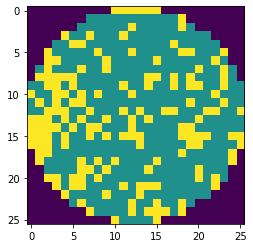

In [92]:
plt.imshow(np.argmax(new_x[3], axis=2))

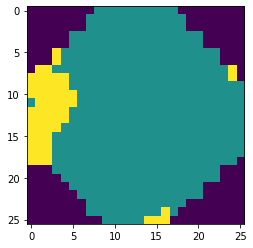

In [93]:
noised_gen_x = np.argmax(decoder.predict(noised_encoded_x), axis=3)
plt.imshow(noised_gen_x[3])

Let's try with another number of epochs

In [94]:
# epochs = 200 
#reload because already trained otherwise => not really realistic on data
input_shape = (26, 26, 3)
input_tensor = Input(input_shape)
encode = layers.Conv2D(64, (3,3), padding='same', activation='relu')(input_tensor)
latent_vector = layers.MaxPool2D()(encode)
decode_layer_1 = layers.Conv2DTranspose(64, (3,3), padding='same', activation='relu')
decode_layer_2 = layers.UpSampling2D()
output_tensor = layers.Conv2DTranspose(3, (3,3), padding='same', activation='sigmoid')
decode = decode_layer_1(latent_vector)
decode = decode_layer_2(decode)

gen_data_encoder = models.Model(input_tensor, output_tensor(decode))
gen_data_encoder.compile(optimizer = 'Adam',
              loss = 'mse')

gen_data_encoder.fit(new_x, new_x,
       batch_size=1024,
       epochs=200,
       verbose=2)

Epoch 1/200
1/1 - 1s - loss: 0.2453 - 830ms/epoch - 830ms/step
Epoch 2/200
1/1 - 1s - loss: 0.2251 - 519ms/epoch - 519ms/step
Epoch 3/200
1/1 - 1s - loss: 0.2066 - 516ms/epoch - 516ms/step
Epoch 4/200
1/1 - 1s - loss: 0.1899 - 523ms/epoch - 523ms/step
Epoch 5/200
1/1 - 1s - loss: 0.1759 - 510ms/epoch - 510ms/step
Epoch 6/200
1/1 - 1s - loss: 0.1660 - 518ms/epoch - 518ms/step
Epoch 7/200
1/1 - 1s - loss: 0.1608 - 517ms/epoch - 517ms/step
Epoch 8/200
1/1 - 1s - loss: 0.1583 - 540ms/epoch - 540ms/step
Epoch 9/200
1/1 - 1s - loss: 0.1555 - 559ms/epoch - 559ms/step
Epoch 10/200
1/1 - 1s - loss: 0.1512 - 539ms/epoch - 539ms/step
Epoch 11/200
1/1 - 1s - loss: 0.1457 - 531ms/epoch - 531ms/step
Epoch 12/200
1/1 - 1s - loss: 0.1399 - 527ms/epoch - 527ms/step
Epoch 13/200
1/1 - 1s - loss: 0.1337 - 545ms/epoch - 545ms/step
Epoch 14/200
1/1 - 1s - loss: 0.1273 - 556ms/epoch - 556ms/step
Epoch 15/200
1/1 - 1s - loss: 0.1213 - 568ms/epoch - 568ms/step
Epoch 16/200
1/1 - 1s - loss: 0.1166 - 583ms/epoc

Epoch 129/200
1/1 - 1s - loss: 0.0422 - 608ms/epoch - 608ms/step
Epoch 130/200
1/1 - 1s - loss: 0.0420 - 613ms/epoch - 613ms/step
Epoch 131/200
1/1 - 1s - loss: 0.0420 - 632ms/epoch - 632ms/step
Epoch 132/200
1/1 - 1s - loss: 0.0417 - 623ms/epoch - 623ms/step
Epoch 133/200
1/1 - 1s - loss: 0.0412 - 618ms/epoch - 618ms/step
Epoch 134/200
1/1 - 1s - loss: 0.0408 - 639ms/epoch - 639ms/step
Epoch 135/200
1/1 - 1s - loss: 0.0407 - 643ms/epoch - 643ms/step
Epoch 136/200
1/1 - 1s - loss: 0.0406 - 586ms/epoch - 586ms/step
Epoch 137/200
1/1 - 1s - loss: 0.0401 - 578ms/epoch - 578ms/step
Epoch 138/200
1/1 - 1s - loss: 0.0399 - 561ms/epoch - 561ms/step
Epoch 139/200
1/1 - 1s - loss: 0.0398 - 560ms/epoch - 560ms/step
Epoch 140/200
1/1 - 1s - loss: 0.0395 - 554ms/epoch - 554ms/step
Epoch 141/200
1/1 - 1s - loss: 0.0392 - 551ms/epoch - 551ms/step
Epoch 142/200
1/1 - 1s - loss: 0.0390 - 551ms/epoch - 551ms/step
Epoch 143/200
1/1 - 1s - loss: 0.0388 - 532ms/epoch - 532ms/step
Epoch 144/200
1/1 - 1s - 

In [95]:
gen_data_encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 26, 26, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 13, 13, 64)       36928     
 ranspose)                                                       
                                                                 
 up_sampling2d_1 (UpSampling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                           

In [96]:
encoder = models.Model(input_tensor, latent_vector)
decoder_input = Input((13, 13, 64))
decode = decode_layer_1(decoder_input)
decode = decode_layer_2(decode)
decoder = models.Model(decoder_input, output_tensor(decode))
encoded_x = encoder.predict(new_x)
noised_encoded_x = encoded_x + np.random.normal(loc=0, scale=0.1, size = (len(encoded_x), 13, 13, 64))


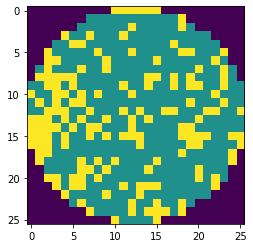

In [97]:
plt.imshow(np.argmax(new_x[3], axis=2))

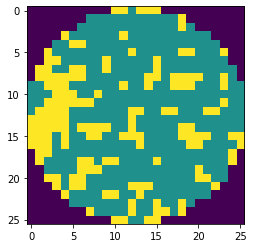

In [98]:
noised_gen_x = np.argmax(decoder.predict(noised_encoded_x), axis=3)
plt.imshow(noised_gen_x[3])

That's pretty good result

Let's generate some data thanks to this encoder

In [99]:
def gen_data(wafer, label, aug):
    #len_wafer = len(wafer)
    encoded_x = encoder.predict(wafer)
    generated_x = np.zeros((1, 26, 26, 3)) #this first data will not be returned, it is useful to concatenate with new data noised
    print(aug//len(wafer), " data added for failure type : ", label)
    for i in range((aug//len(wafer)) + 1):
        noised_encoded_x = encoded_x + np.random.normal(loc=0, scale=0.1, size = (len(encoded_x), 13, 13, 64)) 
        noised_gen_x = decoder.predict(noised_encoded_x) #new data similar to the wafer labeled
        generated_x = np.concatenate((generated_x, noised_gen_x), axis=0)
        #len_wafer = len_wafer+1

    generated_y = np.full((len(generated_x), 1), label) #label data needs to correspond to x
    
    return generated_x[1:], generated_y[1:]



In [100]:
y_failureTypes

array(['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full',
       'Random', 'Scratch'], dtype='<U9')

In order to complete this data augmentation, failure types data y needs to be augmented too : 

In [101]:
new_y = y
for f in y_failureTypes : 
    gen_x, gen_y = gen_data(new_x[np.where(new_y==f)[0]], f, 2000)
    new_x = np.concatenate((new_x, gen_x), axis=0)
    new_y = np.concatenate((new_y, gen_y))

22  data added for failure type :  Center
2000  data added for failure type :  Donut
6  data added for failure type :  Edge-Loc
64  data added for failure type :  Edge-Ring
6  data added for failure type :  Loc
125  data added for failure type :  Near-full
27  data added for failure type :  Random
27  data added for failure type :  Scratch


In [102]:
new_x.shape, gen_x.shape

((17218, 26, 26, 3), (2016, 26, 26, 3))

Besides, another way of augmented data can be used : it is flipping the images ie the wafer maps.

In [103]:
#new_x_flip is the value original of x flipped (same for y)
new_x = np.concatenate((new_x, new_x_flip), axis=0)
new_y = np.concatenate((new_y, new_y_flip))

As it has been done previously, failure types are assigned to int values

In [104]:
for i, l in enumerate(y_failureTypes):
    new_y[new_y==l] = i

In [105]:
new_y = to_categorical(new_y)
new_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

For each row, the column where there is an 1 corresponds to the failureType.

In [106]:
new_y.shape 

(18095, 8)

Now the data is finally shaped and prepared.

In [107]:
print("Augmented x data : ", new_x.shape)
print("Augmented y data : ", new_y.shape)

Augmented x data :  (18095, 26, 26, 3)
Augmented y data :  (18095, 8)


Finally, the data needs to be splitted in two parts train (80%) and test (20%). These data will be used in order to train and test the models.

In [108]:
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y,
                                                    test_size=0.2,
                                                    random_state=2022)


print('X shape:', x_train.shape, x_test.shape)
print('Y shape:', y_train.shape, y_test.shape)

X shape: (14476, 26, 26, 3) (3619, 26, 26, 3)
Y shape: (14476, 8) (3619, 8)


* ### Model

Model 1 : Flatten

In [ ]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(26, 26, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(8, activation='softmax')
])

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=200, batch_size=1024, verbose=2, validation_data=[x_test, y_test])


In [ ]:
test_loss1, test_acc1 = model1.evaluate(x_test,  y_test, verbose=2)


Model 2 : CONV - RELU - FC

In [ ]:
model2 = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=2, activation='relu', input_shape = (26, 26, 3)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(8, activation='softmax')
    
])
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=200, batch_size=1024, verbose=2, validation_data=[x_test, y_test])


    

In [ ]:
test_loss2, test_acc2 = model2.evaluate(x_test,  y_test, verbose=2)



Model 3 : CONV - RELU - FC

In [ ]:
model3 = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=2, activation='relu', input_shape = (26, 26, 3)),
    keras.layers.Flatten(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(8, activation='softmax')
    
])
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model3.fit(x_train, y_train, epochs=200, batch_size=1024, verbose=2, validation_data=[x_test, y_test])




In [ ]:
test_loss3, test_acc3 = model3.evaluate(x_test,  y_test, verbose=2)


Model 4 : CONV - RELU - POOL - FC

In [ ]:
cnn4 = keras.Sequential([
    Input((26, 26, 3)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size= 2),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='softmax')
    ])

cnn4.compile(optimizer='adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

history4 = cnn4.fit(
    x_train,
    y_train,
    batch_size=1024,
    epochs=200,
    verbose=2,
    validation_data=[x_test, y_test]
)

In [ ]:
test_loss4, test_acc4 = cnn4.evaluate(x_test,  y_test, verbose=2)

In [ ]:
cnn4.summary()

Model 5 : CONV - POOL - CONV - POOL - FC

In [ ]:
cnn5 = keras.Sequential([
    Input((26, 26, 3)),
    keras.layers.Conv2D(64, kernel_size=2, activation='relu'),
    keras.layers.MaxPooling2D(pool_size= 2),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(32, kernel_size=2, activation='relu'),
    keras.layers.MaxPooling2D(pool_size= 2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='softmax')
    ])

cnn5.compile(optimizer='adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

history5 = cnn5.fit(
    x_train,
    y_train,
    batch_size=1024,
    epochs=200,
    verbose=2,
    validation_data=[x_test, y_test]
)

In [ ]:
test_loss5, test_acc5 = cnn5.evaluate(x_test,  y_test, verbose=2)

In [ ]:
cnn5.summary()

In [ ]:
cnn6 = keras.Sequential([
    Input((26, 26, 3)),
    keras.layers.Conv2D(64, kernel_size=2, activation='relu'),
    keras.layers.MaxPooling2D(pool_size= 2),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(32, kernel_size=2, activation='relu'),
    keras.layers.MaxPooling2D(pool_size= 2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='softmax')
    ])

cnn6.compile(optimizer='adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

history6 = cnn6.fit(
    x_train,
    y_train,
    batch_size=1024,
    epochs=500,
    verbose=2,
    validation_data=[x_test, y_test]
)

In [ ]:
test_loss6, test_acc6 = cnn6.evaluate(x_test,  y_test, verbose=2)

Model 7 : CONV - POOL - CONV - POOL - CONV - FC

In [ ]:
cnn7 = keras.Sequential([
    Input((26, 26, 3)),
    keras.layers.Conv2D(64, kernel_size=2, activation='relu'),
    keras.layers.MaxPooling2D(pool_size= 2),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(32, kernel_size=2, activation='relu'),
    keras.layers.MaxPooling2D(pool_size= 2),
    keras.layers.Conv2D(16, kernel_size=2, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='softmax')
    ])



cnn7.compile(optimizer='adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

history7 = cnn7.fit(
    x_train,
    y_train,
    batch_size=1024,
    epochs=200,
    verbose=2,
    validation_data=[x_test, y_test]
)



In [ ]:
test_loss7, test_acc7 = cnn7.evaluate(x_test,  y_test, verbose=2)

In [ ]:
cnn7.summary()

In [109]:
cnn8 = keras.Sequential([
    Input((26, 26, 3)),
    keras.layers.Conv2D(64, kernel_size=2, activation='relu'),
    keras.layers.MaxPooling2D(pool_size= 2),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(32, kernel_size=2, activation='relu'),
    keras.layers.MaxPooling2D(pool_size= 2),
    keras.layers.Conv2D(16, kernel_size=2, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='softmax')
    ])



cnn8.compile(optimizer='adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

history8 = cnn8.fit(
    x_train,
    y_train,
    batch_size=2048,
    epochs=200,
    verbose=2,
    validation_data=[x_test, y_test]
)




Epoch 1/200
8/8 - 6s - loss: 2.0330 - accuracy: 0.1755 - val_loss: 1.8788 - val_accuracy: 0.3921 - 6s/epoch - 776ms/step
Epoch 2/200
8/8 - 5s - loss: 1.7133 - accuracy: 0.3808 - val_loss: 1.3769 - val_accuracy: 0.4888 - 5s/epoch - 603ms/step
Epoch 3/200
8/8 - 4s - loss: 1.3517 - accuracy: 0.4583 - val_loss: 1.1601 - val_accuracy: 0.5910 - 4s/epoch - 552ms/step
Epoch 4/200
8/8 - 4s - loss: 1.2103 - accuracy: 0.5156 - val_loss: 1.0614 - val_accuracy: 0.6201 - 4s/epoch - 545ms/step
Epoch 5/200
8/8 - 5s - loss: 1.1011 - accuracy: 0.5568 - val_loss: 0.9779 - val_accuracy: 0.6764 - 5s/epoch - 565ms/step
Epoch 6/200
8/8 - 5s - loss: 1.0250 - accuracy: 0.6009 - val_loss: 0.9092 - val_accuracy: 0.6717 - 5s/epoch - 672ms/step
Epoch 7/200
8/8 - 5s - loss: 0.9490 - accuracy: 0.6380 - val_loss: 0.8502 - val_accuracy: 0.7063 - 5s/epoch - 633ms/step
Epoch 8/200
8/8 - 5s - loss: 0.8952 - accuracy: 0.6597 - val_loss: 0.7879 - val_accuracy: 0.7201 - 5s/epoch - 588ms/step
Epoch 9/200
8/8 - 5s - loss: 0.8

Epoch 69/200
8/8 - 5s - loss: 0.2175 - accuracy: 0.9259 - val_loss: 0.1768 - val_accuracy: 0.9478 - 5s/epoch - 572ms/step
Epoch 70/200
8/8 - 5s - loss: 0.2123 - accuracy: 0.9299 - val_loss: 0.1822 - val_accuracy: 0.9483 - 5s/epoch - 607ms/step
Epoch 71/200
8/8 - 5s - loss: 0.2138 - accuracy: 0.9304 - val_loss: 0.1836 - val_accuracy: 0.9464 - 5s/epoch - 569ms/step
Epoch 72/200
8/8 - 5s - loss: 0.2151 - accuracy: 0.9293 - val_loss: 0.1762 - val_accuracy: 0.9494 - 5s/epoch - 565ms/step
Epoch 73/200
8/8 - 5s - loss: 0.2111 - accuracy: 0.9300 - val_loss: 0.1759 - val_accuracy: 0.9486 - 5s/epoch - 609ms/step
Epoch 74/200
8/8 - 4s - loss: 0.2058 - accuracy: 0.9340 - val_loss: 0.1756 - val_accuracy: 0.9492 - 4s/epoch - 537ms/step
Epoch 75/200
8/8 - 4s - loss: 0.2033 - accuracy: 0.9317 - val_loss: 0.1728 - val_accuracy: 0.9494 - 4s/epoch - 559ms/step
Epoch 76/200
8/8 - 4s - loss: 0.2122 - accuracy: 0.9293 - val_loss: 0.1799 - val_accuracy: 0.9456 - 4s/epoch - 548ms/step
Epoch 77/200
8/8 - 4s - 

Epoch 136/200
8/8 - 4s - loss: 0.1066 - accuracy: 0.9628 - val_loss: 0.1564 - val_accuracy: 0.9635 - 4s/epoch - 513ms/step
Epoch 137/200
8/8 - 4s - loss: 0.1043 - accuracy: 0.9657 - val_loss: 0.1586 - val_accuracy: 0.9624 - 4s/epoch - 514ms/step
Epoch 138/200
8/8 - 4s - loss: 0.1065 - accuracy: 0.9626 - val_loss: 0.1629 - val_accuracy: 0.9627 - 4s/epoch - 510ms/step
Epoch 139/200
8/8 - 4s - loss: 0.1067 - accuracy: 0.9646 - val_loss: 0.1622 - val_accuracy: 0.9632 - 4s/epoch - 518ms/step
Epoch 140/200
8/8 - 4s - loss: 0.1064 - accuracy: 0.9628 - val_loss: 0.1650 - val_accuracy: 0.9627 - 4s/epoch - 516ms/step
Epoch 141/200
8/8 - 4s - loss: 0.1048 - accuracy: 0.9646 - val_loss: 0.1573 - val_accuracy: 0.9610 - 4s/epoch - 521ms/step
Epoch 142/200
8/8 - 4s - loss: 0.1035 - accuracy: 0.9658 - val_loss: 0.1581 - val_accuracy: 0.9605 - 4s/epoch - 516ms/step
Epoch 143/200
8/8 - 5s - loss: 0.1083 - accuracy: 0.9641 - val_loss: 0.1717 - val_accuracy: 0.9635 - 5s/epoch - 574ms/step
Epoch 144/200
8/

In [110]:
test_loss8, test_acc8 = cnn8.evaluate(x_test,  y_test, verbose=2)

114/114 - 0s - loss: 0.1879 - accuracy: 0.9616 - 343ms/epoch - 3ms/step


* ### Validation model

In [ ]:
history5.history.keys()

In [ ]:
# accuracy plot 
history = history5
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model5 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model5 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
history = history6
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model6 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model6 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
history = history7
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model7 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model7 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The model7 is much better than model5 and model6, it can be seen with the gap between train and test lines

In [ ]:
history = history8
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 8 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model 8 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This is on this model that train and test lines are the most similar. So it can be defined as the best model.

In [ ]:
cnn8.summary()

For example, here is the result of one test : 

In [111]:
cnn8.predict(x_test)

array([[8.7292302e-01, 4.8225239e-08, 6.4398617e-02, ..., 7.0244582e-06,
        5.8633450e-05, 3.0245767e-03],
       [2.2750011e-05, 1.1002450e-08, 2.3840637e-04, ..., 2.3284229e-03,
        5.6742219e-04, 3.6357116e-05],
       [3.1043488e-08, 9.9687159e-10, 9.9852031e-01, ..., 8.4211655e-07,
        2.9617895e-06, 4.2262368e-06],
       ...,
       [9.9999070e-01, 8.4084444e-15, 8.6681058e-07, ..., 2.6010143e-13,
        4.1292612e-08, 9.7237780e-08],
       [5.3146484e-16, 1.4599340e-15, 6.8699694e-05, ..., 6.8545972e-14,
        7.7624528e-13, 1.8893138e-18],
       [6.4064751e-19, 1.0000000e+00, 6.3021814e-09, ..., 2.9046803e-13,
        7.4833024e-19, 1.8732366e-20]], dtype=float32)

In [119]:
tf.argmax(cnn8.predict(x_test)) 

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 61,   8,  32, 139, 219, 506,  23,  21])>

In [117]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [116]:
predicted_digits = tf.argmax(cnn8.predict(x_test), axis=0)
missclassified_flags = predicted_digits != y_test
missclassified_digits = x_test[missclassified_flags]
missclassified_labels = y_test[missclassified_flags]
missclassified_preds  = predicted_digits[missclassified_flags]

fig = plt.figure(figsize=(10, 10))
fig.tight_layout()
fig.subplots_adjust(wspace=1)

num_imgs_show = 15
num_cols = 5
num_rows = num_imgs_show // num_cols + 1

for idx in range(num_imgs_show):
    fig.add_subplot(num_rows, num_cols, idx+1)
    plt.imshow(missclassified_digits[idx])
    plt.title("Correct label: {}\nPredicted label: {}".format(missclassified_labels[idx], missclassified_preds[idx]))

print(" Size of test data: {}\n Number of correctly classified digits: {}\n Number of misclassified digits: {}".format(
    len(missclassified_flags), len(missclassified_flags) - len(missclassified_labels), len(missclassified_labels)
    ))

plt.show()

IndexError: boolean index did not match indexed array along dimension 1; dimension is 26 but corresponding boolean dimension is 8

In [114]:
predicted_digits

<tf.Tensor: shape=(3619,), dtype=int64, numpy=array([0, 4, 2, ..., 0, 3, 1])>

In [115]:
missclassified_flags

<tf.Tensor: shape=(), dtype=bool, numpy=True>